In [1]:
words = open('names.txt','r').read().splitlines()
type(words)

list

In [2]:
combined_string = "".join(words)
unique_characters = set(combined_string)
sorted_unique_characters = sorted(unique_characters)
sorted_unique_characters = ['.']+sorted_unique_characters
print(sorted_unique_characters)
len(sorted_unique_characters)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


27

In [3]:
import torch

# Create a 28x28 zero tensor using PyTorch
seq_count = torch.zeros((27, 27),dtype=torch.int32)


In [4]:
for w in words:
    w = ['.'] + list(w) + ['.']
    for ch1 , ch2 in zip(w , w[1:]):
        seq_count[sorted_unique_characters.index(ch1),sorted_unique_characters.index(ch2)] += 1
      

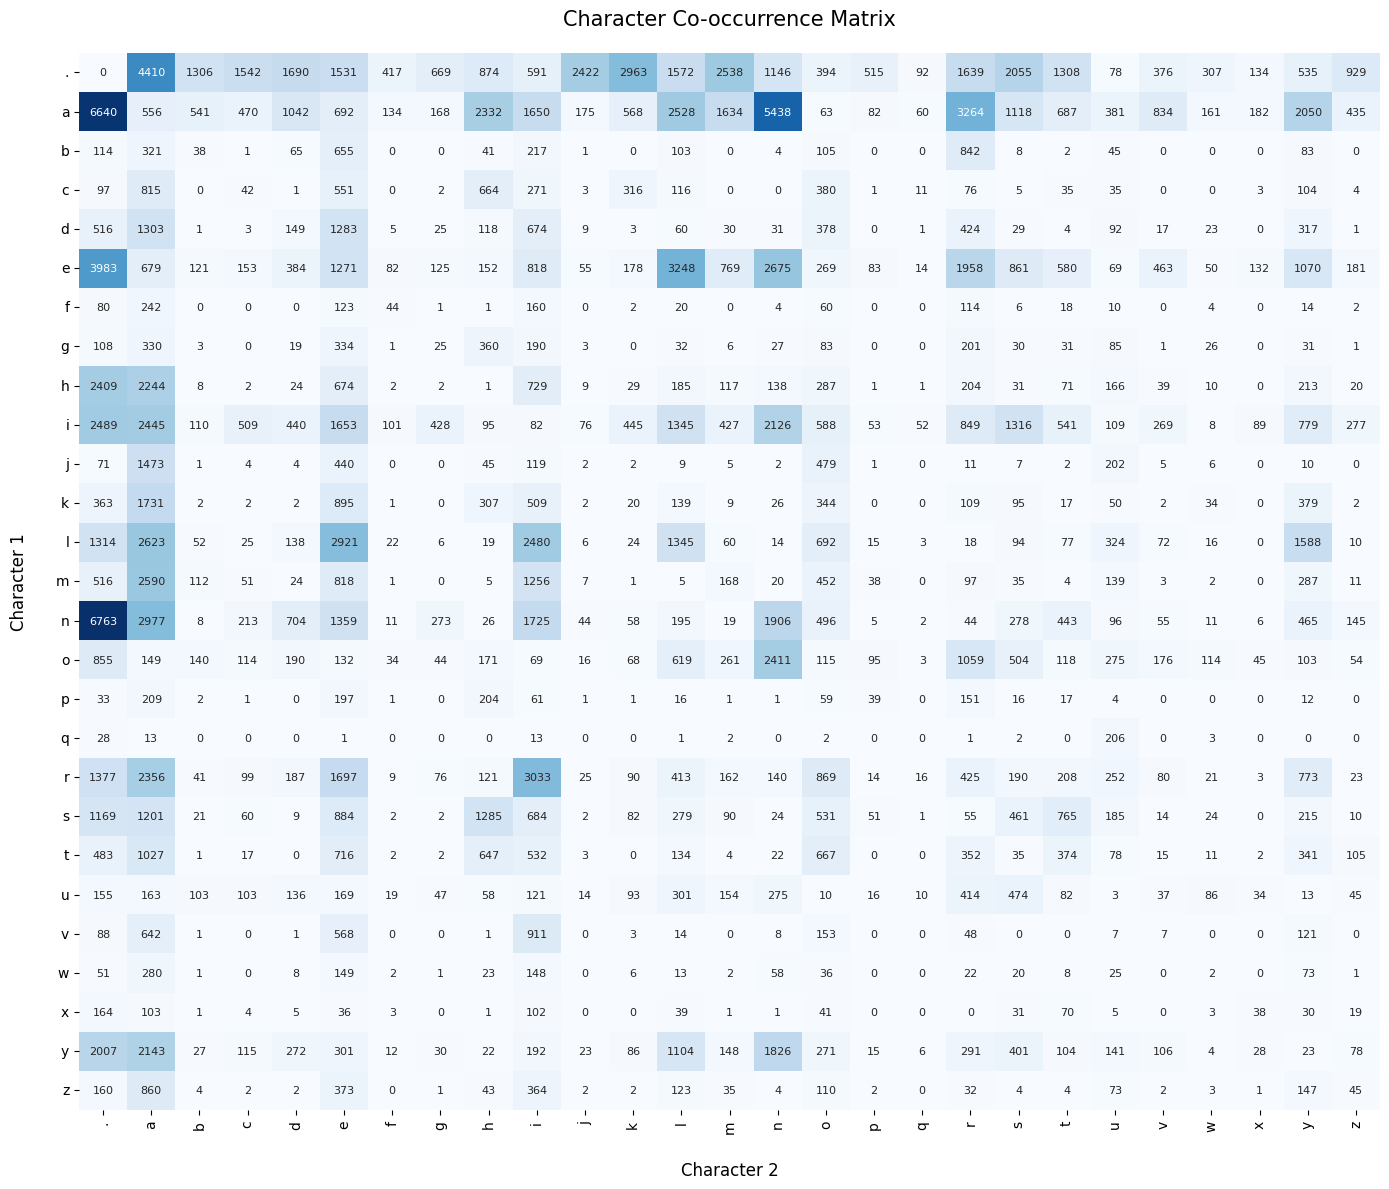

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))
ax = sns.heatmap(seq_count, annot=True, fmt='d', cmap='Blues', xticklabels=sorted_unique_characters, yticklabels=sorted_unique_characters, cbar=False, annot_kws={"size": 8})

# Set labels and title
ax.set_xlabel('Character 2', fontsize=12, labelpad=20)
ax.set_ylabel('Character 1', fontsize=12, labelpad=20)
ax.set_title('Character Co-occurrence Matrix', fontsize=15, pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to make space for labels
plt.tight_layout()

# Set grid background to white
ax.set_facecolor('white')

plt.show()

In [6]:
# you can see that the first coloumn and the last row is empty so what we will do is replace start and end with a dot and make total 27 only ,because . will work as start and end both no coloumn and row will be 0

In [7]:
# our bigram model does work , here you can see what if you do it without it randomly , it performs worse
seq_count = torch.rand(27, 27)

In [8]:
row_sums = seq_count.sum(axis=1)
seq_count = seq_count / row_sums[:, np.newaxis]

In [ ]:
start_word = '.'
word = '.'
while True:
    word_pos = torch.multinomial(seq_count[sorted_unique_characters.index(start_word)],num_samples=1,replacement=True)
    if word_pos == 0:
        print(word)
        break
        
    start_word = sorted_unique_characters[word_pos]
    word = word + start_word
    